In [1]:
import xgboost
import numpy as np
import pandas as pd
import csv
import math
import random
import pickle
import matplotlib.pyplot as plt

In [2]:
training_df = pd.read_csv('data-1-year.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [3]:
training_df = pd.read_csv('data-10-year.csv')
y = training_df['price']
X = training_df.drop('price', axis=1)

In [4]:
def train_val_split(X, y, val_size, random_state):
    # TODO: implement your own train_val_split
    k = 0.9
    n = math.floor(k*val_size)
    X_train = X.sample(frac = 0.9,random_state = random_state)
    X_val = X.drop(X_train.index)
    y_train = y.sample(frac = 0.9,random_state = random_state)
    y_val = y.drop(y_train.index)
    #print(y_train)
    #print(X_train)
    return X_train, X_val, y_train, y_val

In [5]:
random_state = random.getstate()[1][0]

X_train, X_val, y_train, y_val = train_val_split(X, y, X.size, random_state)

print(X_train)
print(type(X_train.loc[3,'area']))
#print(y_train)

        longitude   latitude  house_age    area  elevator  janitor  \
15645  120.970075  24.821417         35   21.79         0        0   
36699  121.007368  24.791860         20   29.42         1        1   
48603  121.024812  24.778713         25   44.78         1        1   
58701  121.025673  24.781629         23   50.87         1        1   
25335  120.931444  24.838965          1   34.20         1        0   
...           ...        ...        ...     ...       ...      ...   
64812  121.020166  24.788275          1   84.32         1        1   
13353  121.012640  24.790966          4  113.30         1        1   
4566   120.964793  24.818825         18   57.34         1        1   
20781  120.961771  24.801769         13   12.56         1        1   
35213  120.953096  24.802760          9   54.34         1        1   

       parking_space  closing_year  bedroom  living_room  ...  residential  \
15645              0           109        3            2  ...            1   
366

In [8]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
# xgbrf = xgboost.XGBRFRegressor()
# xgbrf.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [9]:
score = xgb.score(X_val,y_val)
predictions = xgb.predict(X_val)
mse = ((predictions - y_val)**2).sum()
print(abs((predictions - y_val)/y_val).sum())
print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))
score = xgbrf.score(X_val,y_val)
# predictions = xgbrf.predict(X_val)
# mse = ((predictions - y_val)**2).sum()
# print(abs((predictions - y_val)/y_val).sum())
# print(score,math.sqrt(mse/len(predictions)),mse/(1-score)/len(predictions))

1068.9350706129285
0.7837699106531495 8440019.618214209 329435793931416.06


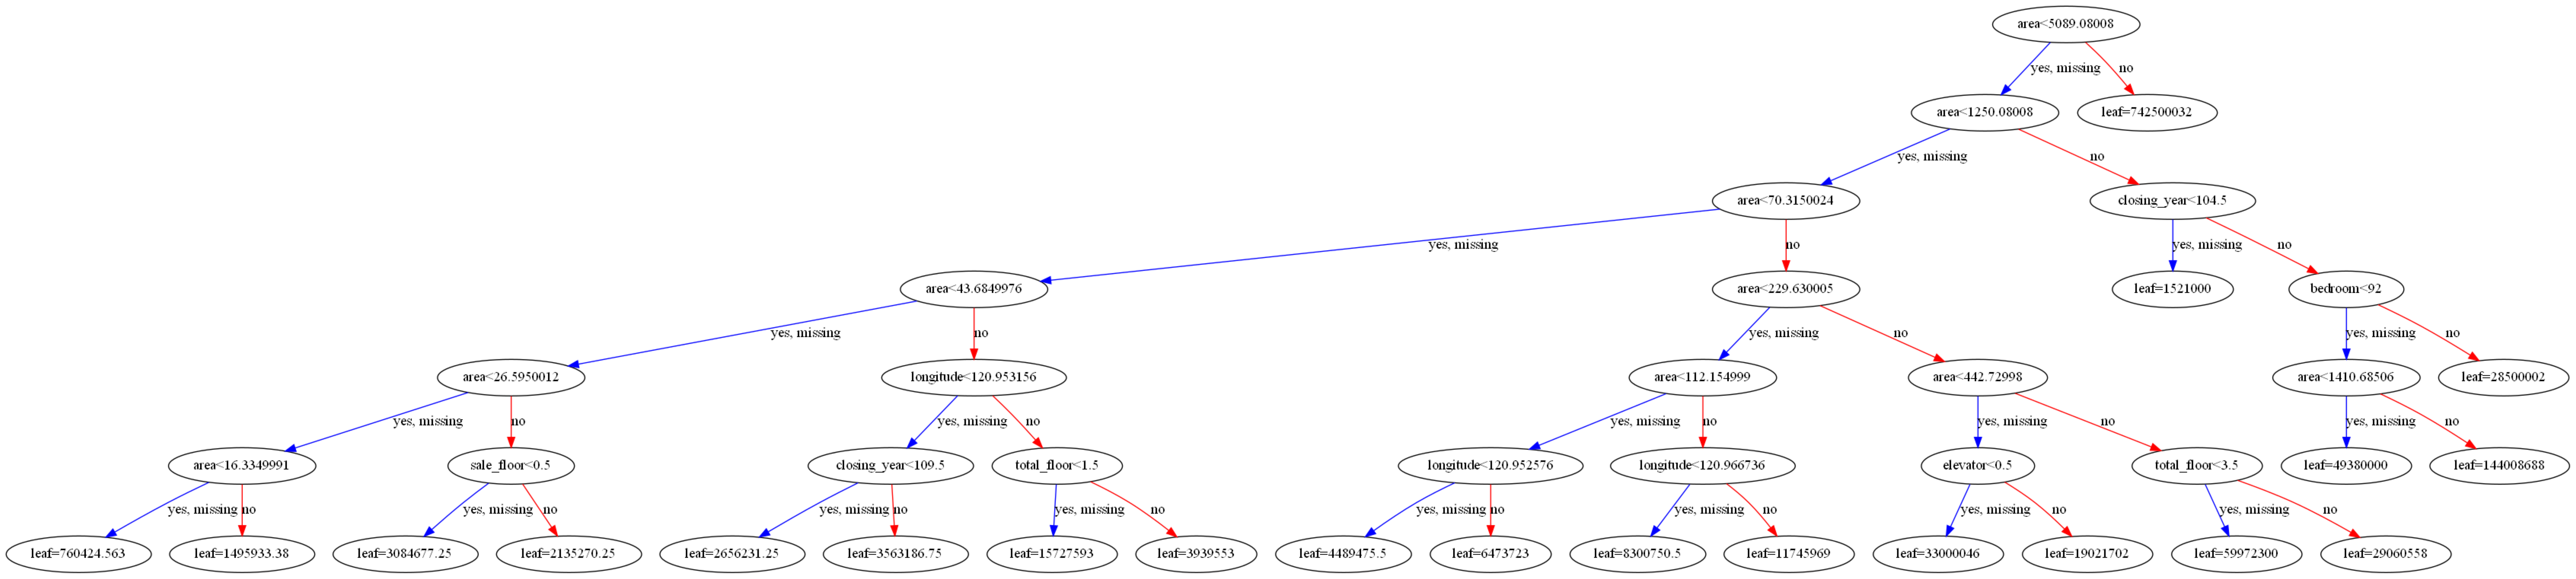

In [10]:
from graphviz import Digraph
from xgboost import plot_tree
import matplotlib.pyplot as plt

# 創建呈現在每一棵樹上的feature name
def create_feature_map(features):
    outfile = open("xgb.fmap", "w")
    i = 0
    for feat in features:
        outfile.write("{0}\t{1}\tq\t".format(i, feat))
        i = i+1
    outfile.close

create_feature_map(X_train.columns)
plot_tree(xgb, # 引入上面訓練好的xgb model 
          num_trees=0, # 第幾棵樹
          fmap="xgb.fmap") # 引入feature name

fig = plt.gcf()
fig.set_size_inches(150, 100)
plt.show()